In [51]:
import matplotlib.pyplot as plt
import numpy as np
import random
from multiprocessing import Pool
from itertools import product
import math
import scipy.io
import scipy.interpolate
%matplotlib inline

#sETTING THE GAME
liveplot = 40; # if >0, plots the sheet of activity during the simulation on every liveplot'th step

usePeriodicNetwork=1; # if =0, then aperiodic network (no wrap around weights, and a decaying envelope function)
#if periodic then toroidally wrap-around weights, constant envelope function) 

useRealTrajectory =0 # if 0 just give constant velocity else load trajectory
constantVelocity =np.array([[0.5], [0]]) #m/s
print(constantVelocity.shape)
#making weight matrix is.....bleh
useCurrentW = 1
#if 0 you have to load trajectory 

#CELL PARAMETERS
tau = 10
#in ms the time constant for neural response
if ~useRealTrajectory:
    alpha = 0.10315 # input gain
else:
    alpha = 50 # input gain

#NETWORK/WEIGHT PARAMETERS

n=4
ncells = int(n*n)
#a = 1
#lamb = 13
#beta = 3/(lamb**2)
#gamma = 1.1*beta #1.05 lit,1.02 correction, but neither work so 1.1
spikeThres = 0.1 #threshold for plotting a cell as spiked

#SIMULATION PARAMETERS

dt = 0.5 #in ms is the time step for integration
simdur = 100*(10**3) #total simulation time, ms
stabilizationTime = 100 # no-velocity time for pattern to for, ms
tind = 0 #time step number for indexing
t = 0 # simulation time variable, ms

#INITIAL CONDITIONS

s = np.random.rand(n*n)#activation of each cell


(2, 1)


In [52]:
#FIRING FIELD PLOT VARIABLES (NOCLUE?!??!)

watchCell = int((n*n)/2 - n/2)
nspatialbins=60
minx = -0.90; maxx=0.90
miny=-0.90; maxy=0.90
occupancy = np.zeros((nspatialbins,nspatialbins))
spikes = np.zeros((nspatialbins,nspatialbins))
spikeCoords = [None] # [none]*10 is the usual format

In [53]:
#CREATE 2XN CELLS PREFERRRED DIRECTION VECTOR (RAD)

dirs = [[0,(np.pi)/2], [np.pi, (np.pi)*3/2]]
dirs = np.tile(dirs, (int(n/2),int(n/2)))
dirs = np.reshape(dirs, ((n**2)))
dirVects = [np.cos(dirs),np.sin(dirs)]

print('mic check')

mic check


In [55]:
#                     UNDER CONSTRUCTION PART

#MAKE X A 2XN CELLS VECTOR OF THE 2D POSITIONS IN THE NEURAL SHEET
x = np.arange(1,n+1,1) 
[X,Y]= np.meshgrid(x,x)
#plt.plot(X,Y,marker = '.', linestyle='none')
X=np.arange(1,n+1)
X=np.repeat(X,n)
Y=np.arange(1,n+1)
Y=[Y]*int(n)
Y=np.reshape(Y,(1,int(n)**2))
x=[X,Y]
cellspacing = 1
ell = 2 #offset of center of inhibitory input usually 2*cellspacing

offset=(np.array(dirVects) *ell)
offset.shape

#cellDists = np.zeros((1,int(n)**2)) #make func to store the dists

(2, 16)

In [56]:
# <insert weight matrix without loops

if useCurrentW==1:
    def dist(x):
        i,j=x
        return (np.sqrt((i[1]-j[1])**2 + (i[0]-j[0])**2))

    def Wij(c):
        i,j=c
        global dists
        dists = np.sqrt((i[1]-j[1])**2 + (i[0]-j[0])**2)
        return (np.exp((-3*1.1/169)*((i[1]-j[1])**2 + (i[0]-j[0])**2))) - (np.exp((-3/169)*((i[1]-j[1])**2 + (i[0]-j[0])**2)))

    #insert offset factor

    x=range(1,n+1)
    y=range(1,n+1)



    P=Pool(3) #Change to no: of cores available
    a=np.array(P.map(Wij,product(product(x,y),product(x,y))))
    cellDists = np.array(P.map(dist,product(product(x,y),product(x,y))))
    weightMatrix=np.reshape(a,(n**2,n**2))
    np.save('weightMatrix',weightMatrix)
    print(weightMatrix.shape)
else:
    print('Loading W from memory...')
    weightMatrix = np.load('wtMatrix.npy')
    weightMatrix = np.delete(weightMatrix,0,0)
    

(16, 16)


In [22]:
#ENVELOPE FUNCTION
if usePeriodicNetwork:
    #Periodic
    A=np.array((n**2,1))
    A = np.ones((int(n*n)));
    
else:
    #Aperiodic
    #plot as : figure; imagesc(reshape(A,sqrt(ncells,sqrt(ncell))))
    R= np.sqrt(ncells)/2;# radius of main network in cell-position units
    a0= np.sqrt(ncells)/32; # envelope fall off rate
    dr = np.sqrt(ncells)/2; # diameter if non-tapered region, in cell-position units
    A = np.exp((-a0*((cellDists)-R + dr)/2)**2);
    nonTaperedInds = np.where(cellDists< (R-dr));
    A[nonTaperedInds] = np.ones(len(nonTaperedInds));
    #zero out if >R?
    #zeroInds = find(cellDists>R)
    #A(zeroInds)= 0;
print((A).shape)

(16,)


In [85]:
#PLOT SHEET OF ACTIVITY
mat_contents = scipy.io.loadmat('/home/test/Desktop/GG/grid models package v1.007/data/HaftingTraj_centimeters_seconds.mat')
pos = mat_contents['pos']
print(vels)
pos[2][:]= np.array(pos[2][:])*1000
mn, mx = min(pos[2]), max(pos[2])
posnew = [0,0,0]
t = np.arange(mn, mx, dt)
posnew = [scipy.interpolate.interp1d(pos[2], pos[0])(t), scipy.interpolate.interp1d(pos[2], pos[1])(t), t]
posnew[0:1][:] = np.array(posnew[0:1][:])/100; #cm to m
vels = np.array([np.diff(posnew[0][:]), np.diff(posnew[1][:])])/dt; # m/s

[[ 0.02008032  0.02008032  0.02008032 ...  0.04016064  0.04016064
   0.04016064]
 [-0.06024096 -0.06024096 -0.06024096 ... -0.04016064 -0.04016064
  -0.04016064]]


In [80]:
#TRAJECTORY
if useRealTrajectory:
    mat_contents = scipy.io.loadmat('/home/test/Desktop/GG/grid models package v1.007/data/HaftingTraj_centimeters_seconds.mat')
    pos = mat_contents['pos']
    print(pos)
    pos[2][:]= np.array(pos[2][:])*1000
    mn, mx = min(pos[2]), max(pos[2])
    posnew = [0,0,0]
    t = np.arange(mn, mx, dt)
    posnew = [scipy.interpolate.interp1d(pos[2], pos[0])(t), scipy.interpolate.interp1d(pos[2], pos[1])(t), t]
    posnew[0:1][:] = np.array(posnew[0:1][:])/100; #cm to m
    vels = np.array([np.diff(posnew[0][:]), diff(posnew[1][:])])/dt; # m/s
    # our units are in ms so:
    #pos(3,:) = np.array(pos(3,:))*1000
    #pos = [[scipy.interp1d(pos(2,:),pos(0,:),0:dt:pos(2,end))];
    #       [scipy.interp1d(pos(2,:),pos(1,:),0:dt:pos(2,end))];
    #       [scipy.interp1d(pos(2,:),pos(2,:),0:dt:pos(2,end))];
    #pos(0:1,:) = pos(0:1,:)/100; % cm to m
    #vels = [diff(pos(0,:)); diff(pos(1,:))]/dt; % m/s
    

In [10]:
#SIMULATION
print("\n simulation starting. ctrl+c to opt out \n")
curDir = np.zeros((int((simdur)/dt),2))
speed = np.zeros((int((simdur)/dt),2))
while t<simdur:
    tind = tind +1
    t = dt*tind;
    
    #Velocity input
    if t<stabilizationTime:
        v = np.zeros((2,1)); #m/s
    else:
        if useRealTrajectory==0:
            v= constantVelocity
        #else:
        #    v = vels((:,tind));
        
         
    curDir[tind-1] = math.atan2(v[1,:],v[0,:]); #in rad
    speed[tind-1] = np.sqrt(v[0]**2 + v[1]**2); #/dt; m/s
    
    #FeedForward Input
    
    B = np.multiply(A,np.transpose((1 + alpha*np.array(np.dot(np.transpose(offset),v)))))
   
    #Total synaptic driving currents
    
    sInputs = B + np.transpose((np.dot(weightMatrix,np.transpose(s))))
    
    #Synaptic drive increases only if input cells are over threshold..>0
    mask = (sInputs <= 0)
    sInputs[mask] = 0
    
    s= s + (dt/tau)*(np.array(sInputs - s)) #Improve integration algorithm
    
    #Save firing field info (avg. s in each spatial bin)
    if useRealTrajectory:
        if s(watchCell)>spikeThresh:
            spikeCoords = [spikeCoords,[pos(0,tind),pos(1,tind)]]
            
        xindex = round((pos(0,tind)-minx)/(maxx-minx)*nSpatialBins)+1;
        yindex = round((pos(1,tind)-miny)/(maxy-miny)*nSpatialBins)+1;
        occupancy[yindex,xindex] = occupancy(yindex,xindex) + dt;
        spikes[yindex,xindex] = spikes(yindex,xindex) + s(watchCell);
        
    #if (livePlot>0 and (livePlot==1 or (tind%livePlot==1))):
    #    if useRealTrajectory==0:
    #        fig, ax = plt.subplots()
    #        ax.set_title("Activity of sheet of cells on brain's surface")
    #        ax.imshow(np.reshape(s,(n,n)))
    #        plt.axis(square)
    #if (tind%35 == 0):
     #   tmp = s.reshape(n,n)
      #  plt.imshow(tmp, cmap='hot', interpolation='nearest')
       # plt.show        
print(s.shape)   
print("only logical errors now! ")


 simulation starting. ctrl+c to opt out 

(1, 16)
only logical errors now! 


(3, 29416)
[[-6.00552000e+01 -5.96535936e+01 -5.96535936e+01 ...  4.88967100e+01
   4.96999229e+01  5.05031357e+01]
 [ 5.93944000e+01  5.81895807e+01  5.81895807e+01 ... -6.08933876e+01
  -6.16966005e+01 -6.24998133e+01]
 [ 0.00000000e+00  2.00000000e+01  4.00000000e+01 ...  5.91000000e+05
   5.91020000e+05  5.91040000e+05]]


0.0

In [77]:
mn, mx = min(pos[2]), max(pos[2])
posnew = [0,0,0]
t = np.arange(mn, mx, dt)
posnew = [scipy.interpolate.interp1d(pos[2], pos[0])(t), scipy.interpolate.interp1d(pos[2], pos[1])(t), t]



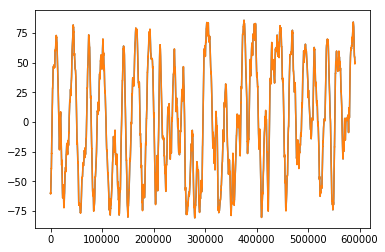

In [72]:
plt.plot(pos[2][::10],pos[0][::10])
plt.plot(t[::10],posnew0[::10])

In [ ]:
pos = [[scipy.interpolate.interp1d((pos[2][:],pos[0][:]), 0:dt:pos[2][end])];
       [scipy.interpolate.interp1d(pos[2][:],pos[1][:], 0:dt:pos[2][end])];
       [scipy.interpolate.interp1d(pos[2][:],pos[2][:], 0:dt:pos[2][end])]]
pos[0:1][:] = np.array(pos[0:1][:])/100;1
vels = np.array((np.diff(pos[0][:]); diff(pos[1][:])))/dt; # m/s